<a href="https://colab.research.google.com/github/Krishnan54117/ML-ASSIGNMENT/blob/main/HK21AIA30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [12]:
df = pd.read_csv('Purchase_new.csv')

In [13]:
df.head()

,Holiday,Discount,Free Delivery,Purchase
0,0,1,1,1
1,0,1,1,1
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Holiday        30 non-null     int64
 1   Discount       30 non-null     int64
 2   Free Delivery  30 non-null     int64
 3   Purchase       30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [15]:
df.isna().sum()

Holiday          0
Discount         0
Free Delivery    0
Purchase         0
dtype: int64

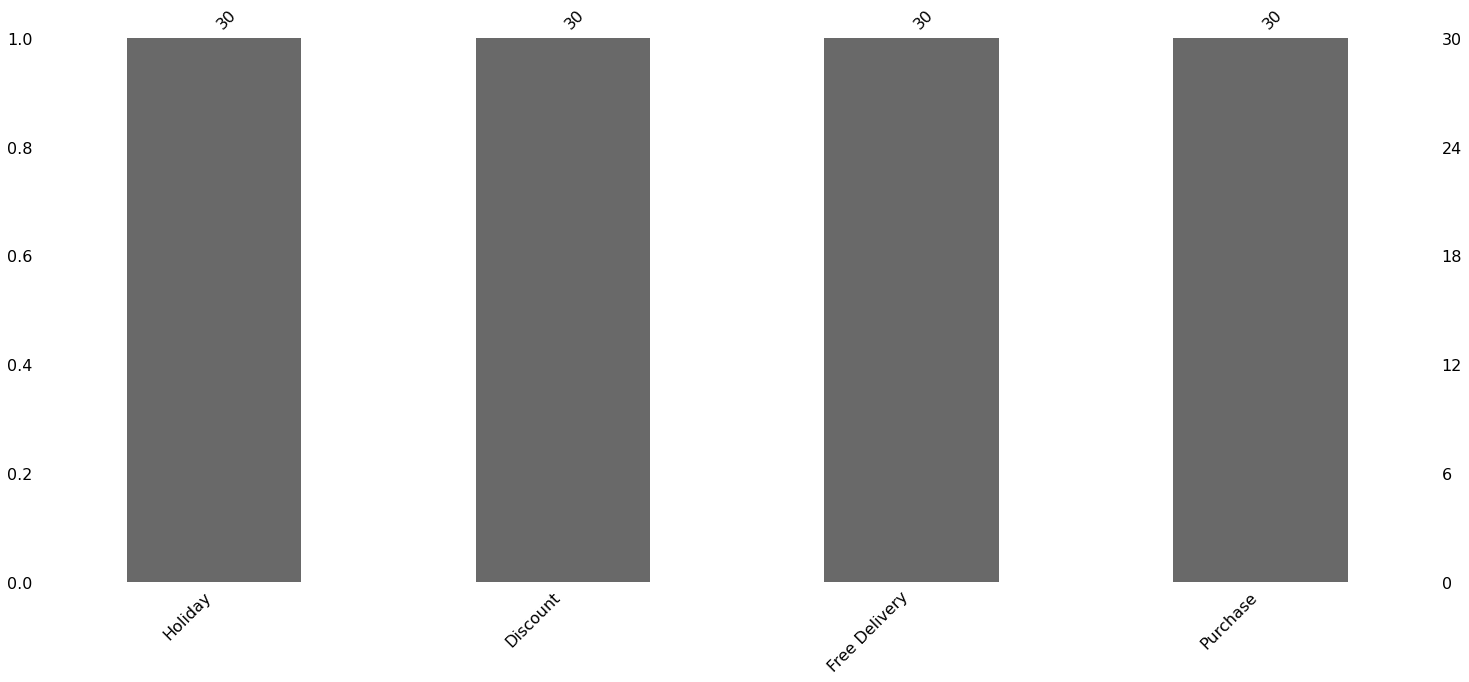

In [16]:
import missingno as mn
mn.bar(df)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


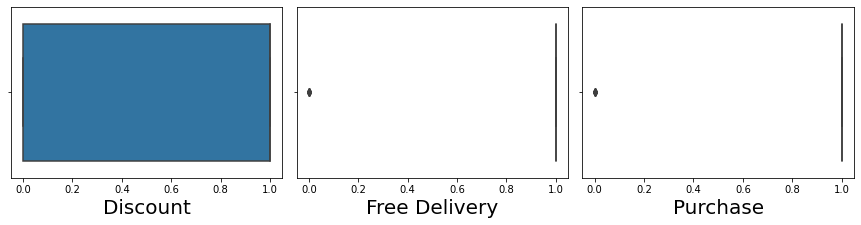

In [17]:
X=df.drop('Holiday',axis=1)
Y=df['Holiday']
plt.figure(figsize=(20,15))
plotnumber=1
for col in X.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

In [18]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.5, random_state=0)

In [19]:
a = StandardScaler()
X_train = a.fit_transform(X_train)
X_test = a.transform(X_test)

In [20]:
#train the model
clf = DecisionTreeClassifier(criterion = "entropy",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [21]:
#predict the values of testing
Y_pred =clf.predict(X_test)

In [22]:
#calculate how well the prediction is
cm = confusion_matrix(Y_test,Y_pred)
cm

array([[3, 2],
       [4, 6]])

In [23]:
accuracy_score(Y_test,Y_pred)

0.6

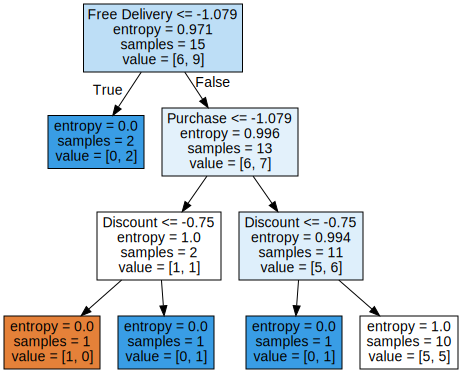

In [24]:
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))